# Cardiovascular Disease Prediction

This notebook is a binary classification problem that utilizes various Python-based machine learning and data science libraries in an attempt to build a machine learning model that qill be used to build a simple web application capable of predicting whether or not someone has heart disease based on their last clinical parameters.
Below is the approach we are going to follow:
1. Problem definition
2. Features
3. Data Overview and Exploration
4. Data Cleaning and Feature Engineering
5. Data Visualization
6. Modelling
7. Hyperparemeter Tuning
8. Evaluation
9. Feature Importance

#### Importing all the required libraries

In [93]:
import warnings
warnings.filterwarnings('ignore')

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Features

his is where we will get different information about each of the features in our data

**Let's Create a data dictionary**

1. age - Patient age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (0=absence, 1=presence) - the predicted attribute

## 3. Data Overview and Exploration

In [3]:
heart = pd.read_csv('Heart_data.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
1588,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
1589,56.0,0.0,NaN,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
1590,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [4]:
# Checking for missing values
heart.isnull().sum()

age          79
sex          31
cp          159
trestbps      0
chol         63
fbs          79
restecg       7
thalach       0
exang        47
oldpeak      31
slope        54
ca            0
thal          7
target        0
dtype: int64

Looks like we have a lot of missing values in our data. We would have to handle them appropriately so that our model is not affected negatively. This will be done in the data cleaning and feature engineering step.

In [5]:
# Viewing information about the data
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 174.3 KB


In [6]:
heart['target'].nunique()

5

In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1513.000000,1561.00000,1433.000000,1592.000000,1529.000000,1513.000000,1585.000000,1592.000000,1545.000000,1561.000000,1538.000000,1592.000000,1585.000000,1592.000000
mean,54.427627,0.68802,1.731333,131.581658,246.507521,0.147389,0.699685,149.300251,0.333981,1.066496,1.455787,0.725503,3.173502,0.751884
std,9.076772,0.46345,1.463610,17.610804,51.317002,0.354611,0.764196,23.007862,0.471786,1.171509,0.623490,1.000014,1.698798,0.782024
min,29.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.00000,2.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,3.000000,1.000000
75%,61.000000,1.00000,3.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,4.000000


The target column has five unique classes but we only need two classes since this is a binary classification project. This will be fixed in the next step.

## 4. Data Cleaning and Feature Engineering

In [8]:
classes = {
    0:'0',
    1:'1',
    2:'1',
    3:'1',
    4:'1',
}

heart['target'] = heart['target'].map(classes)
heart['target'].astype(int)
heart['target']

0       0
1       1
2       1
3       0
4       0
       ..
1587    1
1588    1
1589    1
1590    1
1591    1
Name: target, Length: 1592, dtype: object

In [9]:
heart['target'].nunique()

2

In [13]:
# Let's view information about our data after modifying the target column
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int32  
dtypes: float64(13), int32(1)
memory usage: 168.0 KB


Looks like the target column has changed from `int` data type to `object` data type after modification. We are going to convert it back to `int` data type below

In [14]:
heart['target'] = heart['target'].astype(str).astype(int)
heart['target']

0       0
1       1
2       1
3       0
4       0
       ..
1587    1
1588    1
1589    1
1590    1
1591    1
Name: target, Length: 1592, dtype: int32

In [15]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int32  
dtypes: float64(13), int32(1)
memory usage: 168.0 KB


Great! Let's more to the next step

In [16]:
heart.sex = heart.sex.astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [17]:
heart.age = heart.age.astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [18]:
heart.cp = heart.cp.astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [19]:
heart.trestbps = heart.trestbps.astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [20]:
heart.chol = heart.chol.astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [21]:
heart.fbs = heart.fbs.astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [22]:
heart.restecg = heart.restecg.astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [23]:
heart.thalach = heart.thalach.astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [24]:
heart.exang = heart.exang.astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [25]:
heart.slope = heart.slope.astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [26]:
heart.ca = heart.ca.astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [27]:
heart.thal = heart.thal.astype(float)
pd.options.display.float_format = '{:.0f}'.format

In [28]:
# Checking for the columns in numeric form
for label, content in heart.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


In [29]:
# Checking for missing values
heart.isna().sum()

age          79
sex          31
cp          159
trestbps      0
chol         63
fbs          79
restecg       7
thalach       0
exang        47
oldpeak      31
slope        54
ca            0
thal          7
target        0
dtype: int64

In [30]:
# Filling numeric rows with missing values with the median
for label, content in heart.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            heart[label+"_is_missing"] = pd.isnull(content)
            heart[label] = content.fillna(content.median())

In [31]:
# Checking for missing values again
heart.isna().sum()

age                   0
sex                   0
cp                    0
trestbps              0
chol                  0
fbs                   0
restecg               0
thalach               0
exang                 0
oldpeak               0
slope                 0
ca                    0
thal                  0
target                0
age_is_missing        0
sex_is_missing        0
cp_is_missing         0
chol_is_missing       0
fbs_is_missing        0
restecg_is_missing    0
exang_is_missing      0
oldpeak_is_missing    0
slope_is_missing      0
thal_is_missing       0
dtype: int64

In [32]:
heart.drop(columns=['age_is_missing', 'sex_is_missing','cp_is_missing', 'chol_is_missing', 'fbs_is_missing',
                     'restecg_is_missing', 'exang_is_missing', 'oldpeak_is_missing', 'slope_is_missing', 'thal_is_missing'], inplace=True)

In [33]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1,2,3,3,1
2,67,1,4,120,229,0,2,129,1,3,2,2,7,1
3,37,1,3,130,250,0,1,187,0,4,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,52,1,3,172,199,1,0,162,0,0,1,0,7,1
1588,44,1,2,120,263,0,0,173,0,0,1,0,7,1
1589,56,0,2,140,294,0,2,153,0,1,2,0,3,1
1590,57,1,4,140,192,0,0,148,0,0,2,0,6,1


In [34]:
# Checking for missing values again
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 5. Data Visualization

In [35]:
# Let's find out how many of each class there are
heart["target"].value_counts()

1    933
0    659
Name: target, dtype: int64

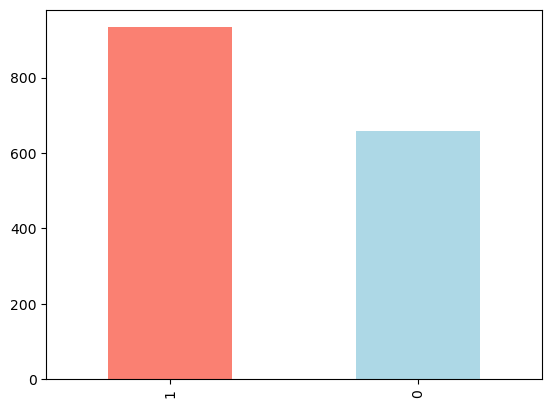

In [36]:
# Let's visualize  how many of each class there are
heart["target"].value_counts().plot(kind="bar", color=['salmon', 'lightblue']);

In [37]:
# Compare target column with sex column
pd.crosstab(heart.target, heart.sex)

sex,0,1
target,,
0,156,503
1,331,602


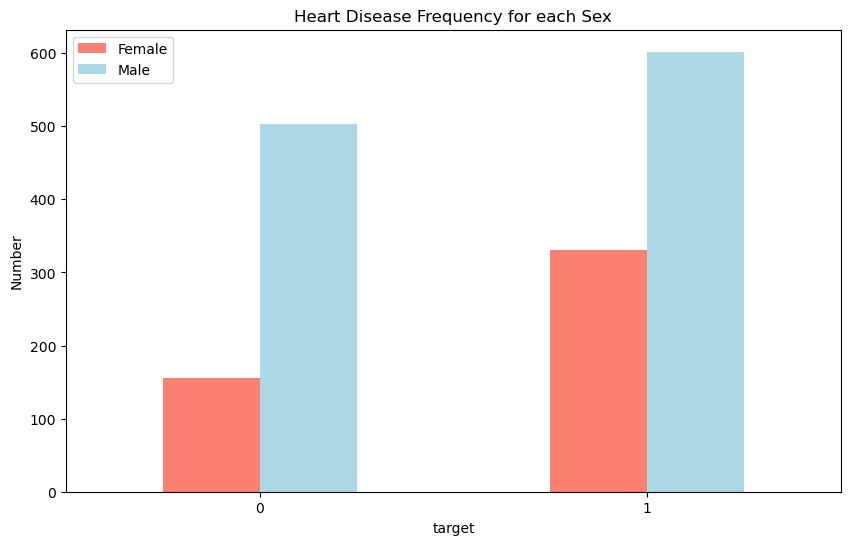

In [38]:
# Create a plot of crosstab
pd.crosstab(heart.target, heart.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for each Sex")
plt.ylabel("Number")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [39]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0,-0,0,0,0,0,-0,0,0,-0,0,0,-0
sex,-0,1,-0,-0,-0,0,-0,-0,0,0,-0,0,0,-0
cp,-0,-0,1,0,-0,0,0,0,-0,-0,0,-0,0,0
trestbps,0,-0,0,1,0,0,0,-0,0,0,-0,0,0,-0
chol,0,-0,-0,0,1,0,0,-0,0,0,-0,0,0,-0
fbs,0,0,0,0,0,1,-0,-0,0,0,-0,0,-0,-0
restecg,0,-0,0,0,0,-0,1,-0,0,0,0,0,0,0
thalach,-0,-0,0,-0,-0,-0,-0,1,-0,-0,0,-0,-0,0
exang,0,0,-0,0,0,0,0,-0,1,0,-0,0,0,-0
oldpeak,0,0,-0,0,0,0,0,-0,0,1,-0,0,0,-0


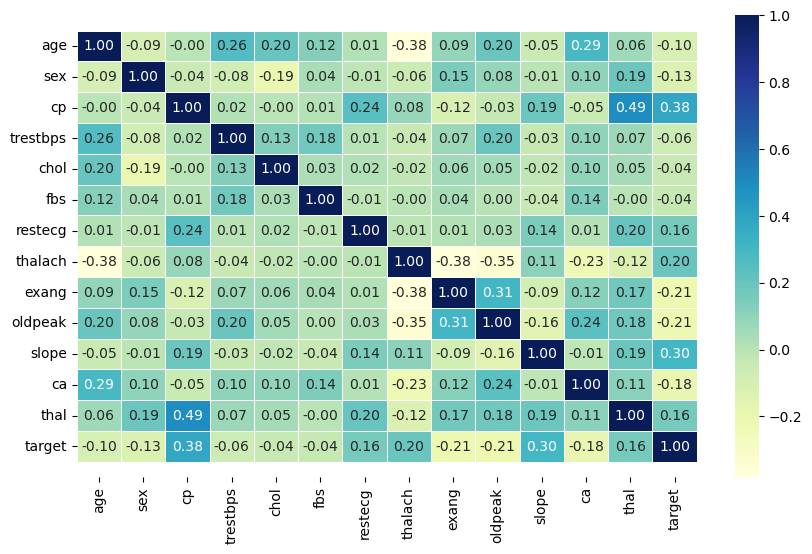

In [40]:
# Visualizing a correlation matrix a little prettier
corr_matrix = heart.corr()
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## 6. Modelling

In [41]:
# Split data into X and y
X = heart.drop("target", axis=1)

y = heart["target"]

In [42]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [44]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [45]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.768025078369906,
 'KNN': 0.7429467084639498,
 'Random Forest': 0.8338557993730408}

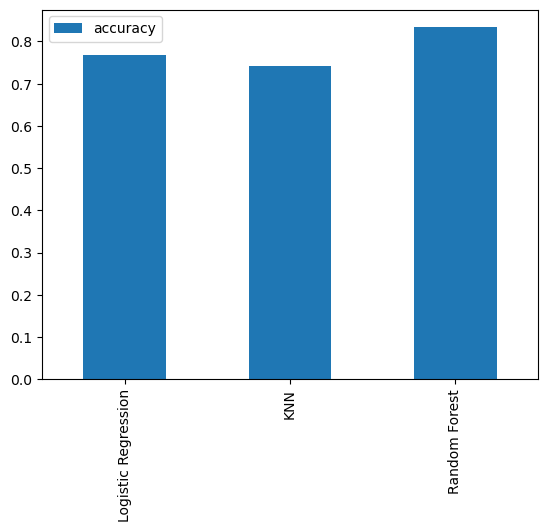

In [46]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## 7. Hyperparameter Tuning

#### Tuning by hand

In [47]:
# Tuning KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [48]:
train_scores

[0.9528672427336999,
 0.9057344854673999,
 0.9049489395129615,
 0.8719560094265515,
 0.8750981932443048,
 0.8531029065200314,
 0.8468185388845247,
 0.8436763550667714,
 0.8366064414768264,
 0.8240377062058131,
 0.8271798900235664,
 0.828750981932443,
 0.8311076197957581,
 0.8185388845247447,
 0.812254516889238,
 0.8177533385703064,
 0.8248232521602514,
 0.8256087981146897,
 0.816967792615868,
 0.809897879025923]

In [49]:
test_scores

[0.8275862068965517,
 0.786833855799373,
 0.7899686520376176,
 0.7460815047021944,
 0.7429467084639498,
 0.7460815047021944,
 0.7460815047021944,
 0.7429467084639498,
 0.7711598746081505,
 0.7586206896551724,
 0.7711598746081505,
 0.7648902821316614,
 0.7554858934169278,
 0.7492163009404389,
 0.7554858934169278,
 0.7492163009404389,
 0.7586206896551724,
 0.7460815047021944,
 0.7492163009404389,
 0.7586206896551724]

Maximum KNN score on the test data: 82.76%


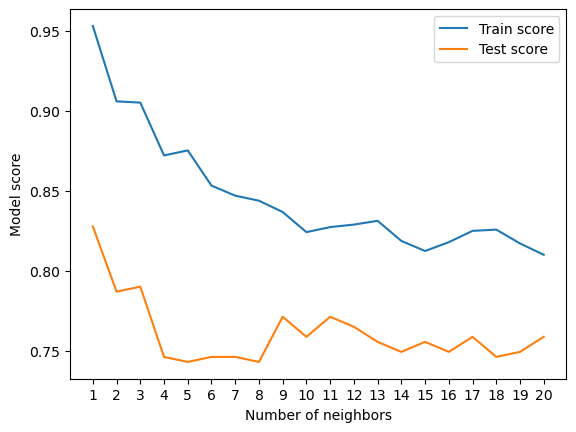

In [50]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [51]:
knn_model =  KNeighborsClassifier(1)
knn = knn_model.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8275862068965517

#### Tuning  with RandomSearchCV

In [52]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [54]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [55]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [56]:
rf_clf = RandomForestClassifier(n_estimators=260,
                                min_samples_split=16,
                                min_samples_leaf=9,
                                max_depth=10)

In [57]:
rs_rf_model = rf_clf.fit(X_train, y_train)
rs_rf_model

RandomForestClassifier(max_depth=10, min_samples_leaf=9, min_samples_split=16,
                       n_estimators=260)

In [58]:
rs_rf_model_preds = rs_rf_model.predict(X_test)
rs_rf_model_preds

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [59]:
# Checking the model's accuracy 
accuracy = accuracy_score(y_test, rs_rf_model_preds)*100
print("The model's accuracy is {:.2f}%".format(accuracy))

The model's accuracy is 82.45%


In [60]:
%%time
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-3, 9, 30),
                "solver": ['liblinear', 'sag', 'saga', 'newton-cholesky'],
                  "penalty": ['l1', 'l2', 'elasticnet'],
                 "max_iter": [250],
                 "warm_start": [True]}

# Setup grid hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                          param_distributions=log_reg_grid,
                          cv=10,
                          verbose=True)

# Fit grid hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: total: 641 ms
Wall time: 860 ms


In [61]:
# Check the best hyperparmaters
rs_log_reg.best_params_

{'warm_start': True,
 'solver': 'liblinear',
 'penalty': 'l1',
 'max_iter': 250,
 'C': 5.298316906283707}

In [62]:
rslog_clf = LogisticRegression(C=5.298316906283707,
                               solver="liblinear",
                               max_iter=250,
                               penalty='l1',
                               warm_start=True)

In [63]:
rslog_model = rslog_clf.fit(X_train, y_train)
rslog_model

LogisticRegression(C=5.298316906283707, max_iter=250, penalty='l1',
                   solver='liblinear', warm_start=True)

In [64]:
rslog_model_preds = rslog_model.predict(X_test)
rslog_model_preds

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [65]:
# Checking the model's accuracy 
accuracy = accuracy_score(y_test, rslog_model_preds)*100
print("The model's accuracy is {:.2f}%".format(accuracy))

The model's accuracy is 77.12%


#### Tuning  with GridSearchCV

In [66]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid_1 = {"n_estimators": np.arange(20, 100, 20),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(5, 20, 5),
           "min_samples_leaf": np.arange(5, 20, 5)}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(), 
                           param_grid=rf_grid_1,
                           cv=10,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
gs_rf.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 5, 10, 15]),
                         'min_samples_split': array([ 5, 10, 15]),
                         'n_estimators': array([20, 40, 60, 80])},
             verbose=True)

In [67]:
# Find the best hyperparameters
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 80}

In [68]:
gsrf_clf = RandomForestClassifier(n_estimators=80,
                                min_samples_split=5,
                                min_samples_leaf=5,
                                max_depth=None)

In [69]:
gsrf_model = gsrf_clf.fit(X_train, y_train)
gsrf_model

RandomForestClassifier(min_samples_leaf=5, min_samples_split=5, n_estimators=80)

In [70]:
gsrf_model_preds = gsrf_model.predict(X_test)
gsrf_model_preds

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [71]:
# Checking the model's accuracy 
accuracy = accuracy_score(y_test, gsrf_model_preds)*100
print("The model's accuracy is {:.2f}%".format(accuracy))

The model's accuracy is 80.88%


In [72]:
%%time
# Different hyperparameters for our LogisticRegression model
log_reg_grid_2 = {"C": np.logspace(-3, 9, 30),
                "solver": ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg_1 = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid_2,
                          cv=20,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg_1.fit(X_train, y_train);

Fitting 20 folds for each of 30 candidates, totalling 600 fits
CPU times: total: 4.16 s
Wall time: 4.18 s


In [73]:
# Find the best hyperparameters
gs_log_reg_1.best_params_

{'C': 0.7880462815669912, 'solver': 'liblinear'}

In [74]:
gs_log_reg_1_clf = LogisticRegression(C=0.7880462815669912, solver='liblinear')

In [75]:
gs_log_reg_1_model = gs_log_reg_1_clf.fit(X_train, y_train)
gs_log_reg_1_model

LogisticRegression(C=0.7880462815669912, solver='liblinear')

In [76]:
gs_log_reg_1_preds = gs_log_reg_1_model.predict(X_test)
gs_log_reg_1_preds

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [77]:
# Checking the model's accuracy 
accuracy = accuracy_score(y_test, gs_log_reg_1_preds)*100
print("The model's accuracy is {:.2f}%".format(accuracy))

The model's accuracy is 76.80%


In [78]:
%%time
# Different hyperparameters for our LogisticRegression model
log_reg_grid_2 = {"C": np.logspace(-3, 9, 30),
                "solver": ['liblinear', 'sag', 'saga', 'newton-cholesky'],
                  "penalty": ['l1', 'l2', 'elasticnet'],
                 "max_iter": [250],
                 "warm_start": [True]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg_2 = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid_2,
                          cv=10,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg_2.fit(X_train, y_train);

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
CPU times: total: 36.1 s
Wall time: 27.7 s


In [79]:
# Find the best hyperparameters
gs_log_reg_2.best_params_

{'C': 0.11721022975334805,
 'max_iter': 250,
 'penalty': 'l1',
 'solver': 'saga',
 'warm_start': True}

In [80]:
gs_log_reg_2_clf = LogisticRegression(C=0.11721022975334805,
                                      max_iter=250,
                                      penalty='l1',
                                      solver='saga',
                                      warm_start=True)

In [81]:
gs_log_reg_2_model = gs_log_reg_2_clf.fit(X_train, y_train)
gs_log_reg_2_model

LogisticRegression(C=0.11721022975334805, max_iter=250, penalty='l1',
                   solver='saga', warm_start=True)

In [82]:
gs_log_reg_2_preds = gs_log_reg_2_model.predict(X_test)
gs_log_reg_2_preds                                    

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [83]:
# Checking the model's accuracy 
accuracy = accuracy_score(y_test, gs_log_reg_2_preds)*100
print("The model's accuracy is {:.2f}%".format(accuracy))

The model's accuracy is 78.06%


### Selecting the best model

In [84]:
# Selecting ideal modeal
ideal_model = RandomForestClassifier().fit(X_train, y_train)
ideal_model

RandomForestClassifier()

## 8. Evaluation

In [85]:
# Calculating the accuracy of our model
ideal_model.score(X_test, y_test)

0.8244514106583072

In [86]:
# Making predictions with our ideal model
ideal_model_preds = ideal_model.predict(X_test)

In [87]:
# Checking the ideal model's accuracy 
accuracy = accuracy_score(y_test, ideal_model_preds)*100
print("The model's accuracy is {:.2f}%".format(accuracy))

The model's accuracy is 82.45%


#### ROC Curve and AUC

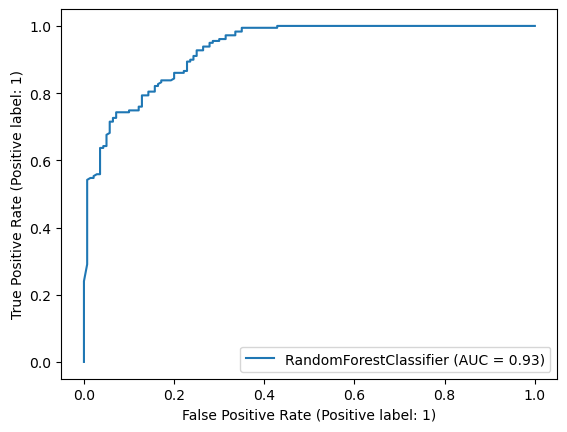

In [90]:
# Plotting ROC curve and calculating and calculating AUC metric
RocCurveDisplay.from_estimator(ideal_model, X_test, y_test);

#### Confusion Matrix

In [94]:
print(confusion_matrix(y_test, ideal_model_preds))

[[108  32]
 [ 24 155]]


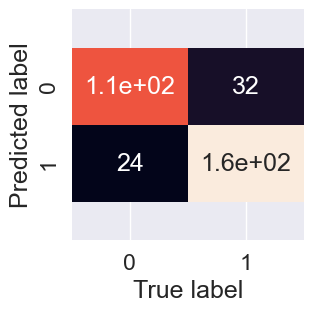

In [95]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test,  ideal_model_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, ideal_model_preds);

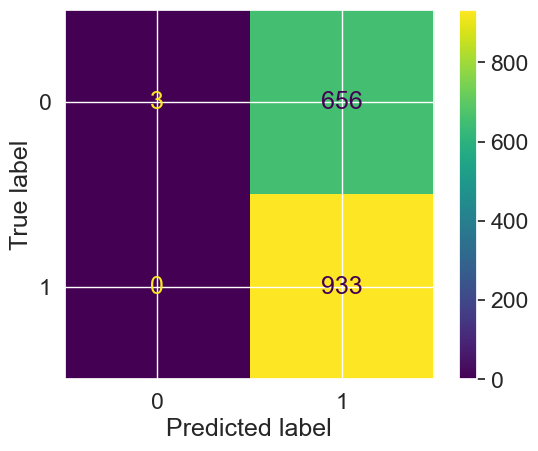

In [99]:
# Option 1: ConfusionMatrixDisplay(from_estimator)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator = ideal_model, X=X, y=y);

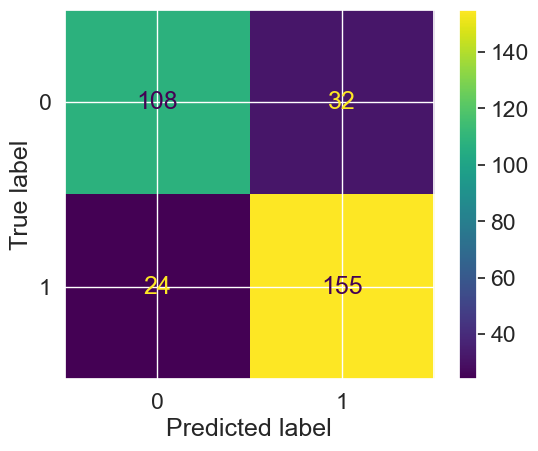

In [100]:
# Option 2: ConfusionMatrixDisplay(from_prediction)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = ideal_model_preds);

#### Classification Report

In [101]:
print(classification_report(y_test, ideal_model_preds))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       140
           1       0.83      0.87      0.85       179

    accuracy                           0.82       319
   macro avg       0.82      0.82      0.82       319
weighted avg       0.82      0.82      0.82       319



## 9. Feature Importance

In [102]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([0.09488176, 0.02924949, 0.16764084, 0.08414347, 0.09412525,
       0.0146841 , 0.03870579, 0.11155065, 0.03081492, 0.096943  ,
       0.07061972, 0.06868213, 0.09795887])

In [103]:
# Helper function for plotting feature importance
def plot_features(columns, importances):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"], df["feature_importances"])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

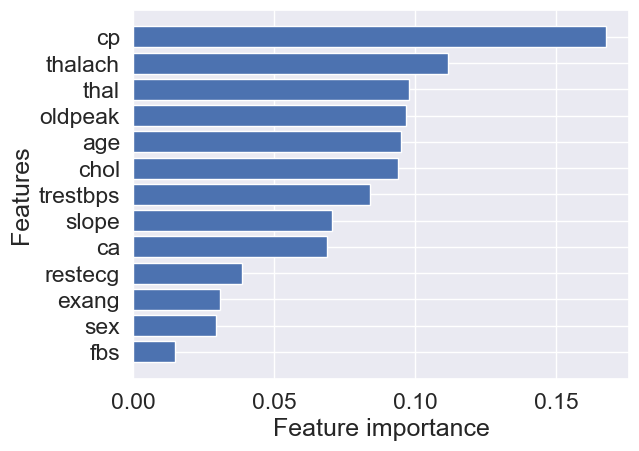

In [104]:
plot_features(X.columns, ideal_model.feature_importances_)